In [1]:
from Dataset import Preprocessing
from Model.mnb import MultinomialNaiveBayes
from Utils.utils import *

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DEBUG = True

In [2]:
data_processing = Preprocessing()
reviews_df, wines_df, users_df, full_df = data_processing.get_dataset()

Reading data...
Cleaning data...
Tokenizing data...
Creating labels...
Balancing data, downsampling.. 


C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py:23: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  self.full_df = pd.read_csv(path + "\\full_dataset.csv")
C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py:42: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 42 of the file C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  no_html = BeautifulSoup(text).get_text()
C:\Users\andre\PycharmProjects\DM2583-project\venv\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The

In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350501 entries, 400317 to 850343
Data columns (total 15 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Wine         1350501 non-null  object 
 1   Year         1316871 non-null  object 
 2   Wine ID      1350501 non-null  int64  
 3   User Rating  1350501 non-null  float64
 4   Note         1350491 non-null  object 
 5   CreatedAt    1350501 non-null  object 
 6   User         1350491 non-null  object 
 7   Winery       1350501 non-null  object 
 8   Rating       1350501 non-null  float64
 9   Country      1350501 non-null  object 
 10  Region       1349494 non-null  object 
 11  Price        1350501 non-null  float64
 12  Cleaned      1350501 non-null  object 
 13  Tokenized    1350501 non-null  object 
 14  Sentiment    1350501 non-null  int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 164.9+ MB


In [4]:
reviews_df.info(), wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630246 entries, 0 to 1630245
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Wine         1630246 non-null  object 
 1   Year         1589277 non-null  object 
 2   Wine ID      1630246 non-null  int64  
 3   User Rating  1630246 non-null  float64
 4   Note         1630236 non-null  object 
 5   CreatedAt    1630246 non-null  object 
 6   User         1630236 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 87.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Winery      1798 non-null   object 
 1   Year        1794 non-null   object 
 2   Wine ID     1798 non-null   int64  
 3   Wine        1798 non-null   object 
 4   Rating      1798 non-null   float64
 5   num_review  1798 non-null   int

(None, None)

In [5]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49297 entries, 0 to 49296
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User         49297 non-null  object
 1   Bio          8886 non-null   object
 2   UserCountry  49297 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


Data Visualization


Rating distribution - Sentiment

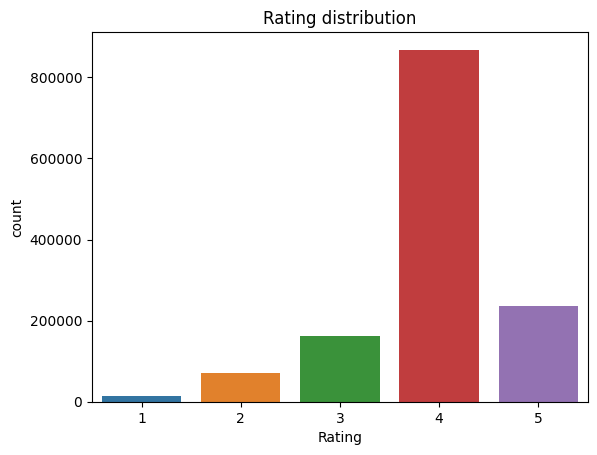

In [6]:
full_df["int_Rating"] = full_df["User Rating"].apply(round)

f = sns.countplot(x='int_Rating', data=full_df)
f.set_title("Rating distribution")
plt.xlabel("Rating");

In [7]:
neg = full_df[full_df["User Rating"]<4].Wine.count()
pos = full_df[full_df["User Rating"]>4].Wine.count()
neutr = pos = full_df[full_df["User Rating"]==4].Wine.count()

neg, neutr,pos

(450167, 450167, 450167)

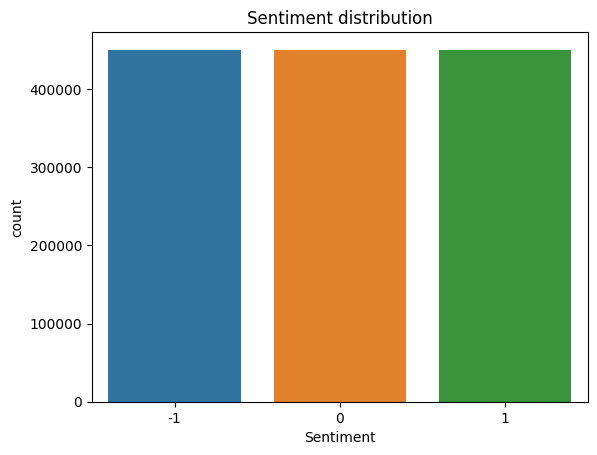

In [8]:

f = sns.countplot(x='Sentiment', data=full_df)
f.set_title("Sentiment distribution")
plt.xlabel("Sentiment");


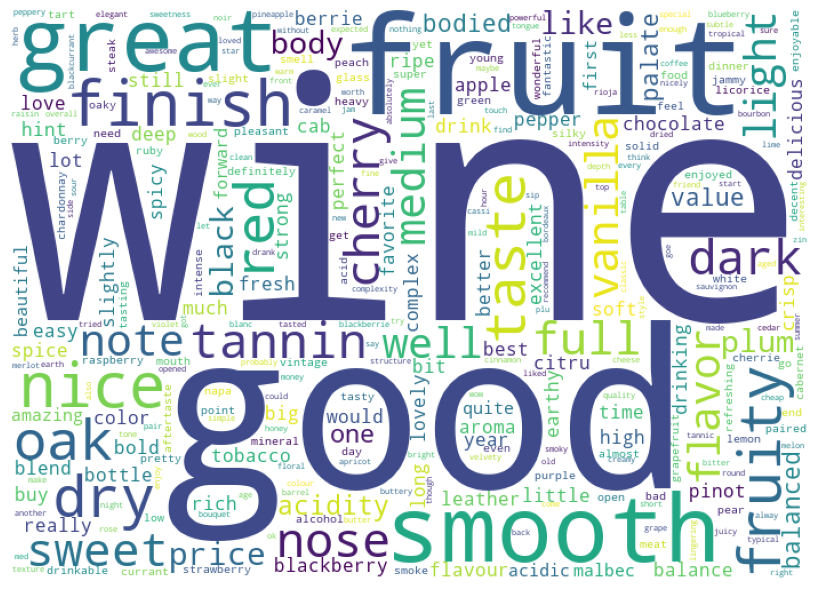

In [9]:
plot_wordcloud(full_df["Cleaned"])

In [10]:
from sklearn.model_selection import train_test_split

X, y = full_df['Tokenized'], full_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

In [11]:
MNB = MultinomialNaiveBayes(
    classes=np.unique(np.array([-1,0,1]))
).fit(X_train.values, y_train.values)

In [12]:
y_hat = MNB.predict(X_test.values)

In [13]:
acc = np.sum(np.equal(y_test.values, y_hat)) / len(y_test)
acc

0.5618399066027234

In [14]:
class_report(y_test,y_hat)

              precision    recall  f1-score   support

          -1       0.62      0.64      0.63    135050
           0       0.46      0.39      0.42    135050
           1       0.58      0.66      0.62    135051

    accuracy                           0.56    405151
   macro avg       0.55      0.56      0.56    405151
weighted avg       0.55      0.56      0.56    405151



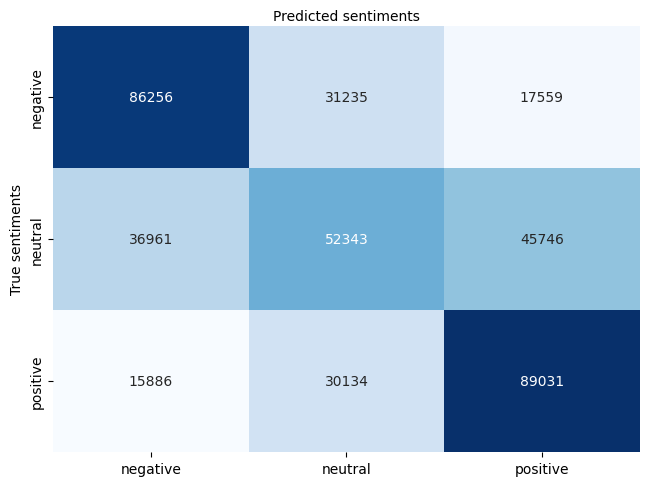

In [15]:
cnf_matrix(y_test,y_hat)


In [16]:
#does not make sense
#plot_sentiment_pred(y_hat,y_test)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(full_df['Tokenized'].astype("U"))

In [18]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [19]:
full_df['cluster'] = model.labels_

In [20]:
clusters = full_df.groupby('cluster')

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :15]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 smooth
 fruity
 wine
 nice
 sweet
 dry
 light
 easy
 like
 finish
 drink
 delicious
 price
 best
 little
------------
Cluster 1:
 taste
 good
 smooth
 great
 fruity
 wine
 nice
 sweet
 dry
 light
 like
 strong
 little
 bit
 price
------------
Cluster 2:
 great
 wine
 value
 price
 smooth
 fruity
 finish
 flavor
 good
 dry
 fruit
 nice
 body
 red
 steak
------------
Cluster 3:
 cherry
 oak
 fruit
 dark
 vanilla
 blackberry
 plum
 medium
 black
 finish
 chocolate
 red
 tannins
 nose
 leather
------------
Cluster 4:
 good
 value
 wine
 price
 fruity
 dry
 smooth
 sweet
 really
 nice
 flavor
 light
 body
 pretty
 money
------------


C:\Users\andre\PycharmProjects\DM2583-project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
Y = vectorizer.transform(["my wine was very good, drink with friend"])
prediction = model.predict(Y)
print(prediction)

[4]


In [22]:
full_df[full_df.cluster==0].groupby(by="Sentiment").count()

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,int_Rating,cluster
Sentiment,,,,,,,,,,,,,,,,
-1,288207,281656,288207,288207,288198,288207,288198,288207,288207,288207,287753,288207,288207,288207,288207,288207
0,258390,250634,258390,258390,258389,258390,258389,258390,258390,258390,258222,258390,258390,258390,258390,258390
1,282611,275016,282611,282611,282611,282611,282611,282611,282611,282611,282501,282611,282611,282611,282611,282611


In [23]:
full_df[full_df.cluster==1].groupby(by="Sentiment").count()


,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,int_Rating,cluster
Sentiment,,,,,,,,,,,,,,,,
-1,28602,27813,28602,28602,28602,28602,28602,28602,28602,28602,28567,28602,28602,28602,28602,28602
0,22041,21401,22041,22041,22041,22041,22041,22041,22041,22041,22026,22041,22041,22041,22041,22041
1,19866,19233,19866,19866,19866,19866,19866,19866,19866,19866,19861,19866,19866,19866,19866,19866


In [24]:
full_df[full_df.cluster==2].groupby(by="Sentiment").count()

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,int_Rating,cluster
Sentiment,,,,,,,,,,,,,,,,
-1,18685,18281,18685,18685,18685,18685,18685,18685,18685,18685,18659,18685,18685,18685,18685,18685
0,40204,38923,40204,40204,40204,40204,40204,40204,40204,40204,40169,40204,40204,40204,40204,40204
1,39470,38315,39470,39470,39470,39470,39470,39470,39470,39470,39449,39470,39470,39470,39470,39470


In [25]:
full_df[full_df.cluster==3].groupby(by="Sentiment").count()

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,int_Rating,cluster
Sentiment,,,,,,,,,,,,,,,,
-1,67467,66382,67467,67467,67467,67467,67467,67467,67467,67467,67428,67467,67467,67467,67467,67467
0,83329,81676,83329,83329,83329,83329,83329,83329,83329,83329,83320,83329,83329,83329,83329,83329
1,84922,83968,84922,84922,84922,84922,84922,84922,84922,84922,84913,84922,84922,84922,84922,84922


In [26]:
full_df[full_df.cluster==4].groupby(by="Sentiment").count()

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,int_Rating,cluster
Sentiment,,,,,,,,,,,,,,,,
-1,47206,46310,47206,47206,47206,47206,47206,47206,47206,47206,47161,47206,47206,47206,47206,47206
0,46203,44747,46203,46203,46203,46203,46203,46203,46203,46203,46177,46203,46203,46203,46203,46203
1,23298,22516,23298,23298,23298,23298,23298,23298,23298,23298,23288,23298,23298,23298,23298,23298


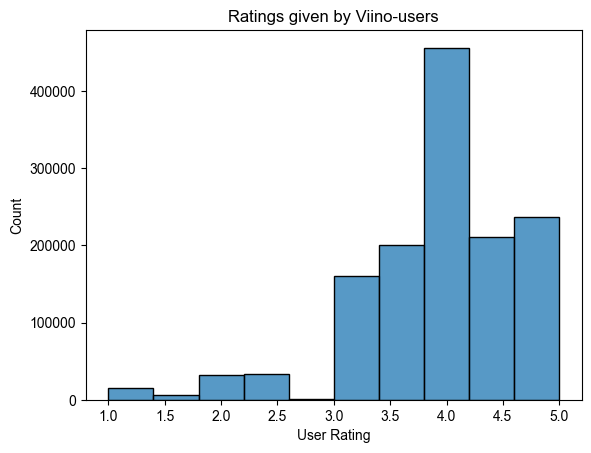

In [27]:
sns.histplot(full_df["User Rating"], bins=10, kde=False).set(title='Ratings given by Viino-users')
sns.set(rc={'figure.figsize':(100,5)})

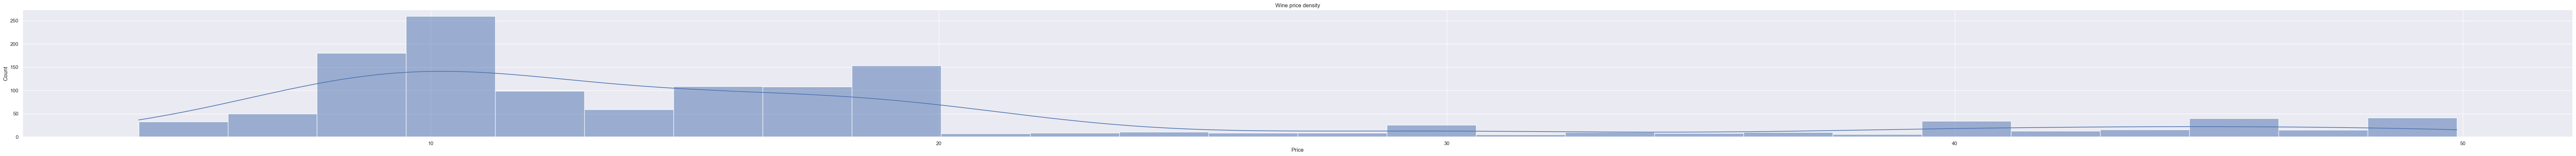

In [28]:
df = wines_df[wines_df.Price<50].sort_values('Price')
bins =  np.arange(0, 50.0, 2)
#plt.hist(df['Price'], bins)
sns.histplot(data=df['Price'], kde=True).set(title='Wine price density')
sns.set(rc={'figure.figsize':(10,10)})

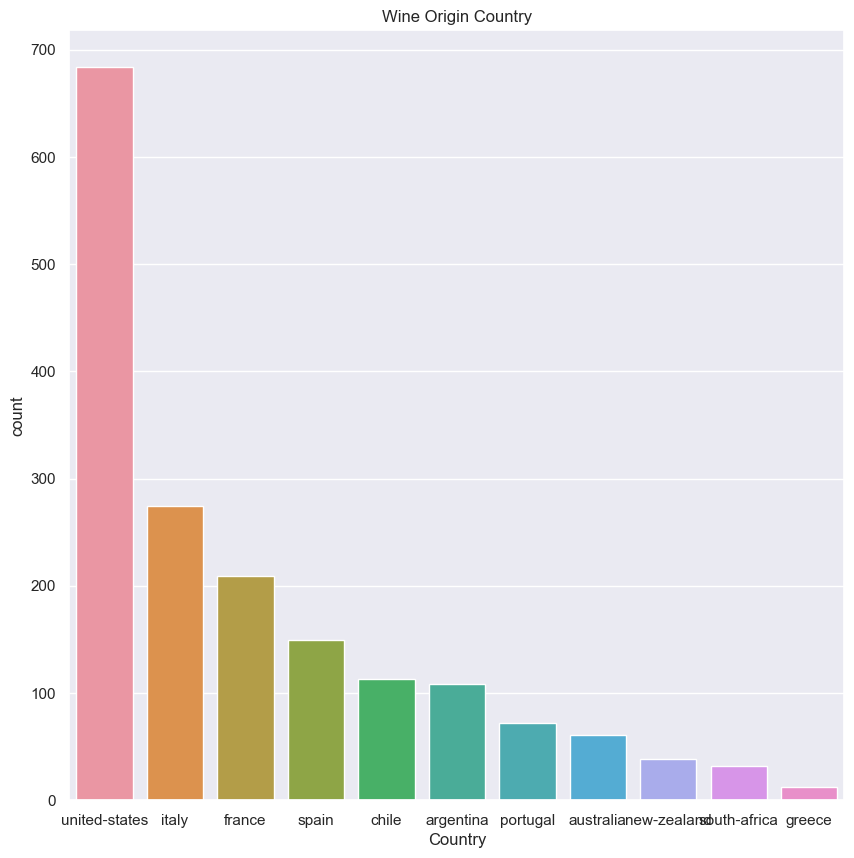

In [29]:
sns.countplot(x = wines_df["Country"], order = wines_df["Country"].value_counts().iloc[:11].index).set(title='Wine Origin Country')
sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)

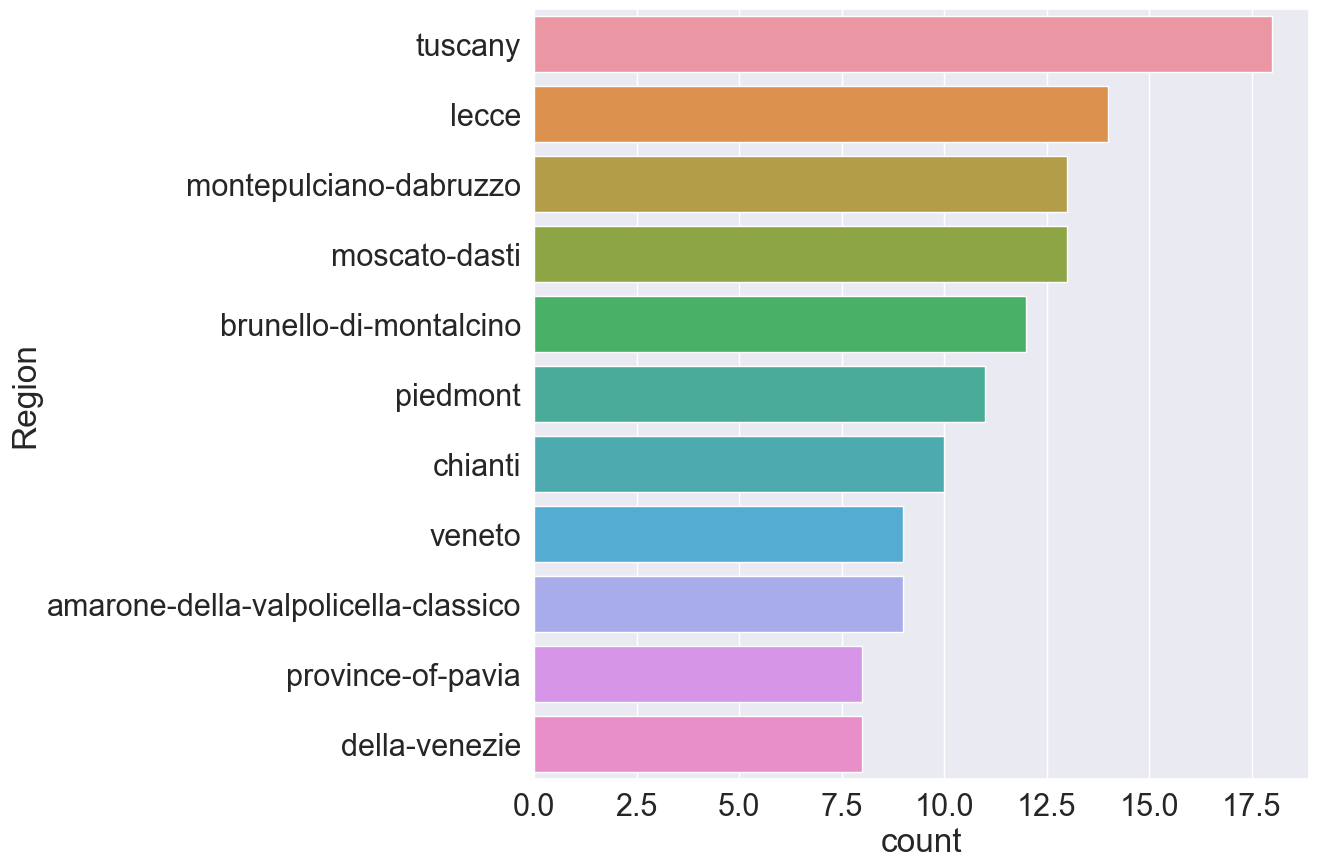

In [30]:
sns.countplot(y = wines_df[wines_df['Country']=='italy']["Region"], order = wines_df[wines_df['Country']=='italy']["Region"].value_counts().iloc[:11].index)
sns.set(rc={'figure.figsize':(30, 10)}, font_scale = 2)

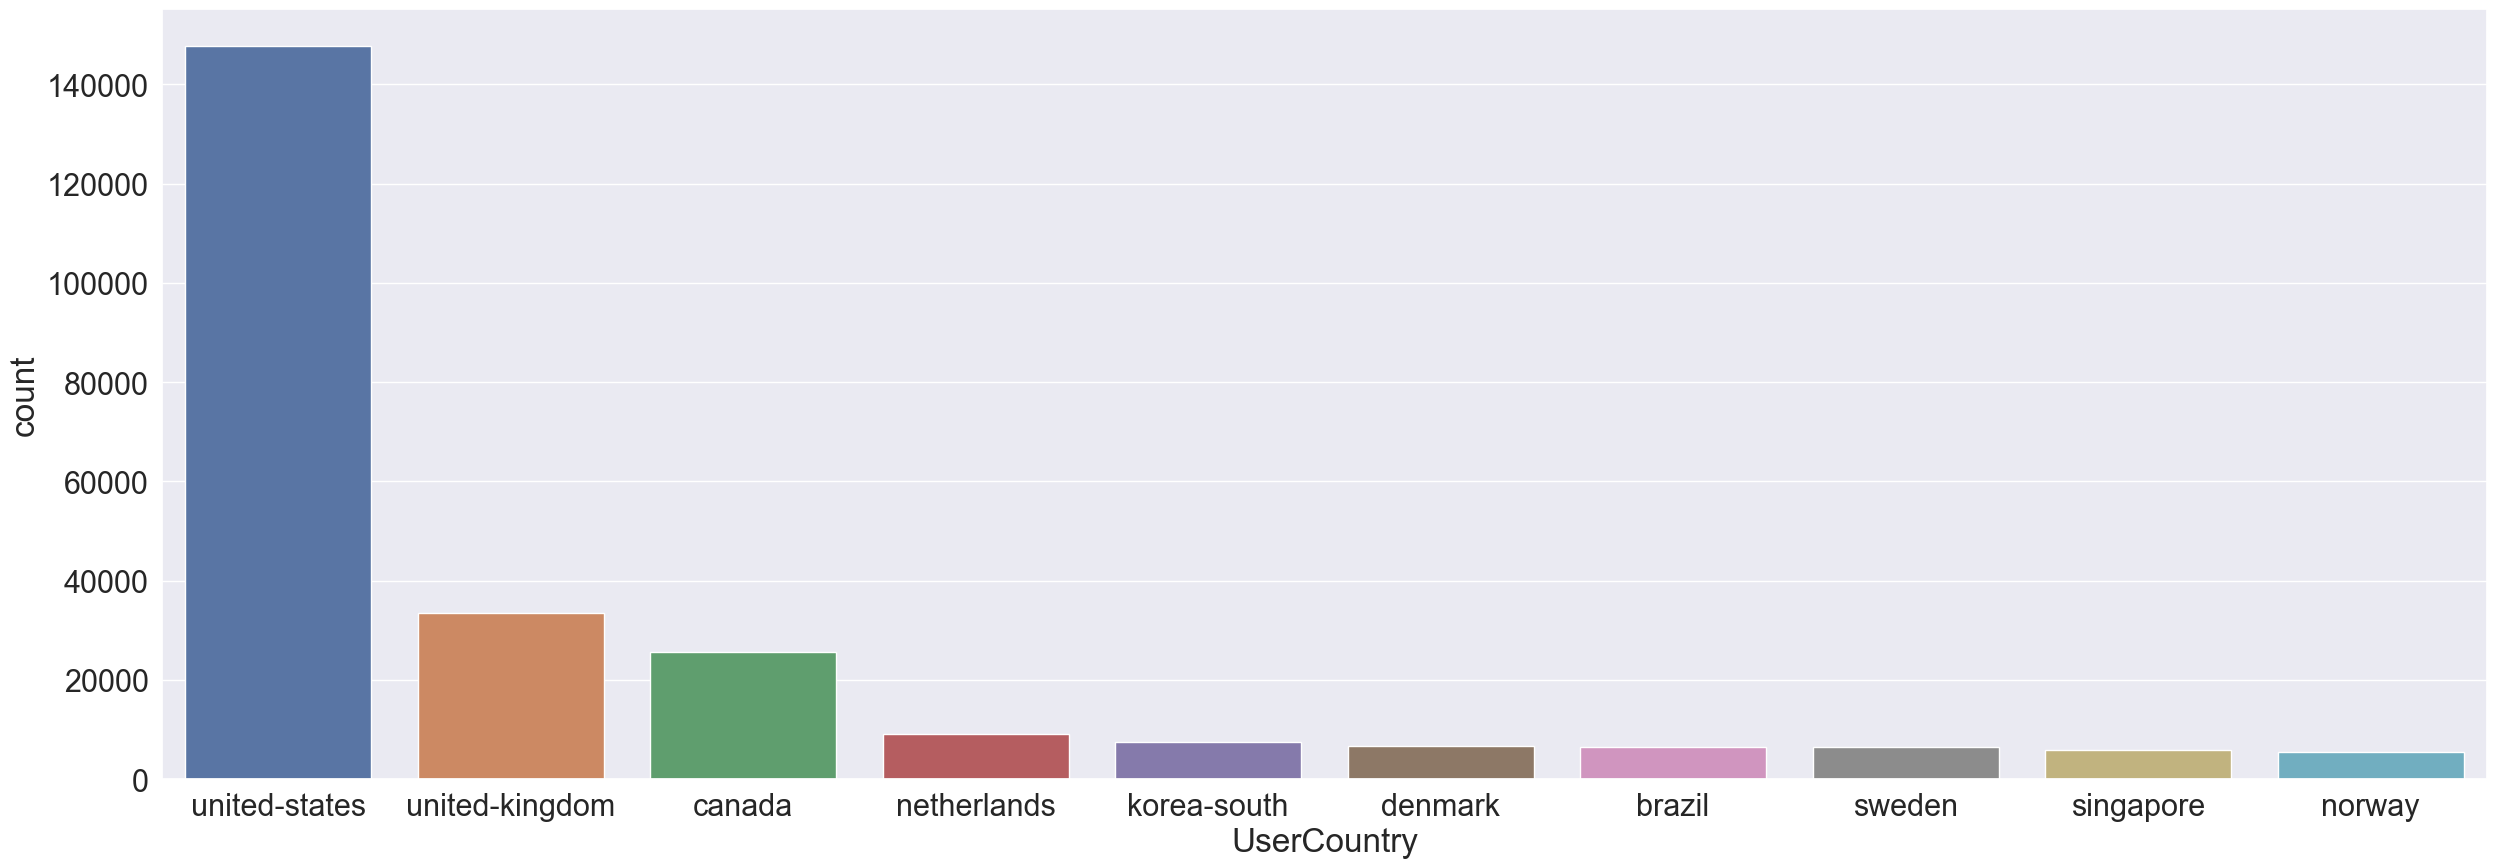

In [31]:
df_users = full_df.merge(users_df,on="User",how='outer')
df_users = df_users[df_users['UserCountry'].notna()]
sns.countplot(x = df_users["UserCountry"], order = df_users["UserCountry"].value_counts().iloc[:10].index)
sns.set(rc={'figure.figsize':(30, 15)}, font_scale = 2)

<AxesSubplot: xlabel='Price', ylabel='count'>

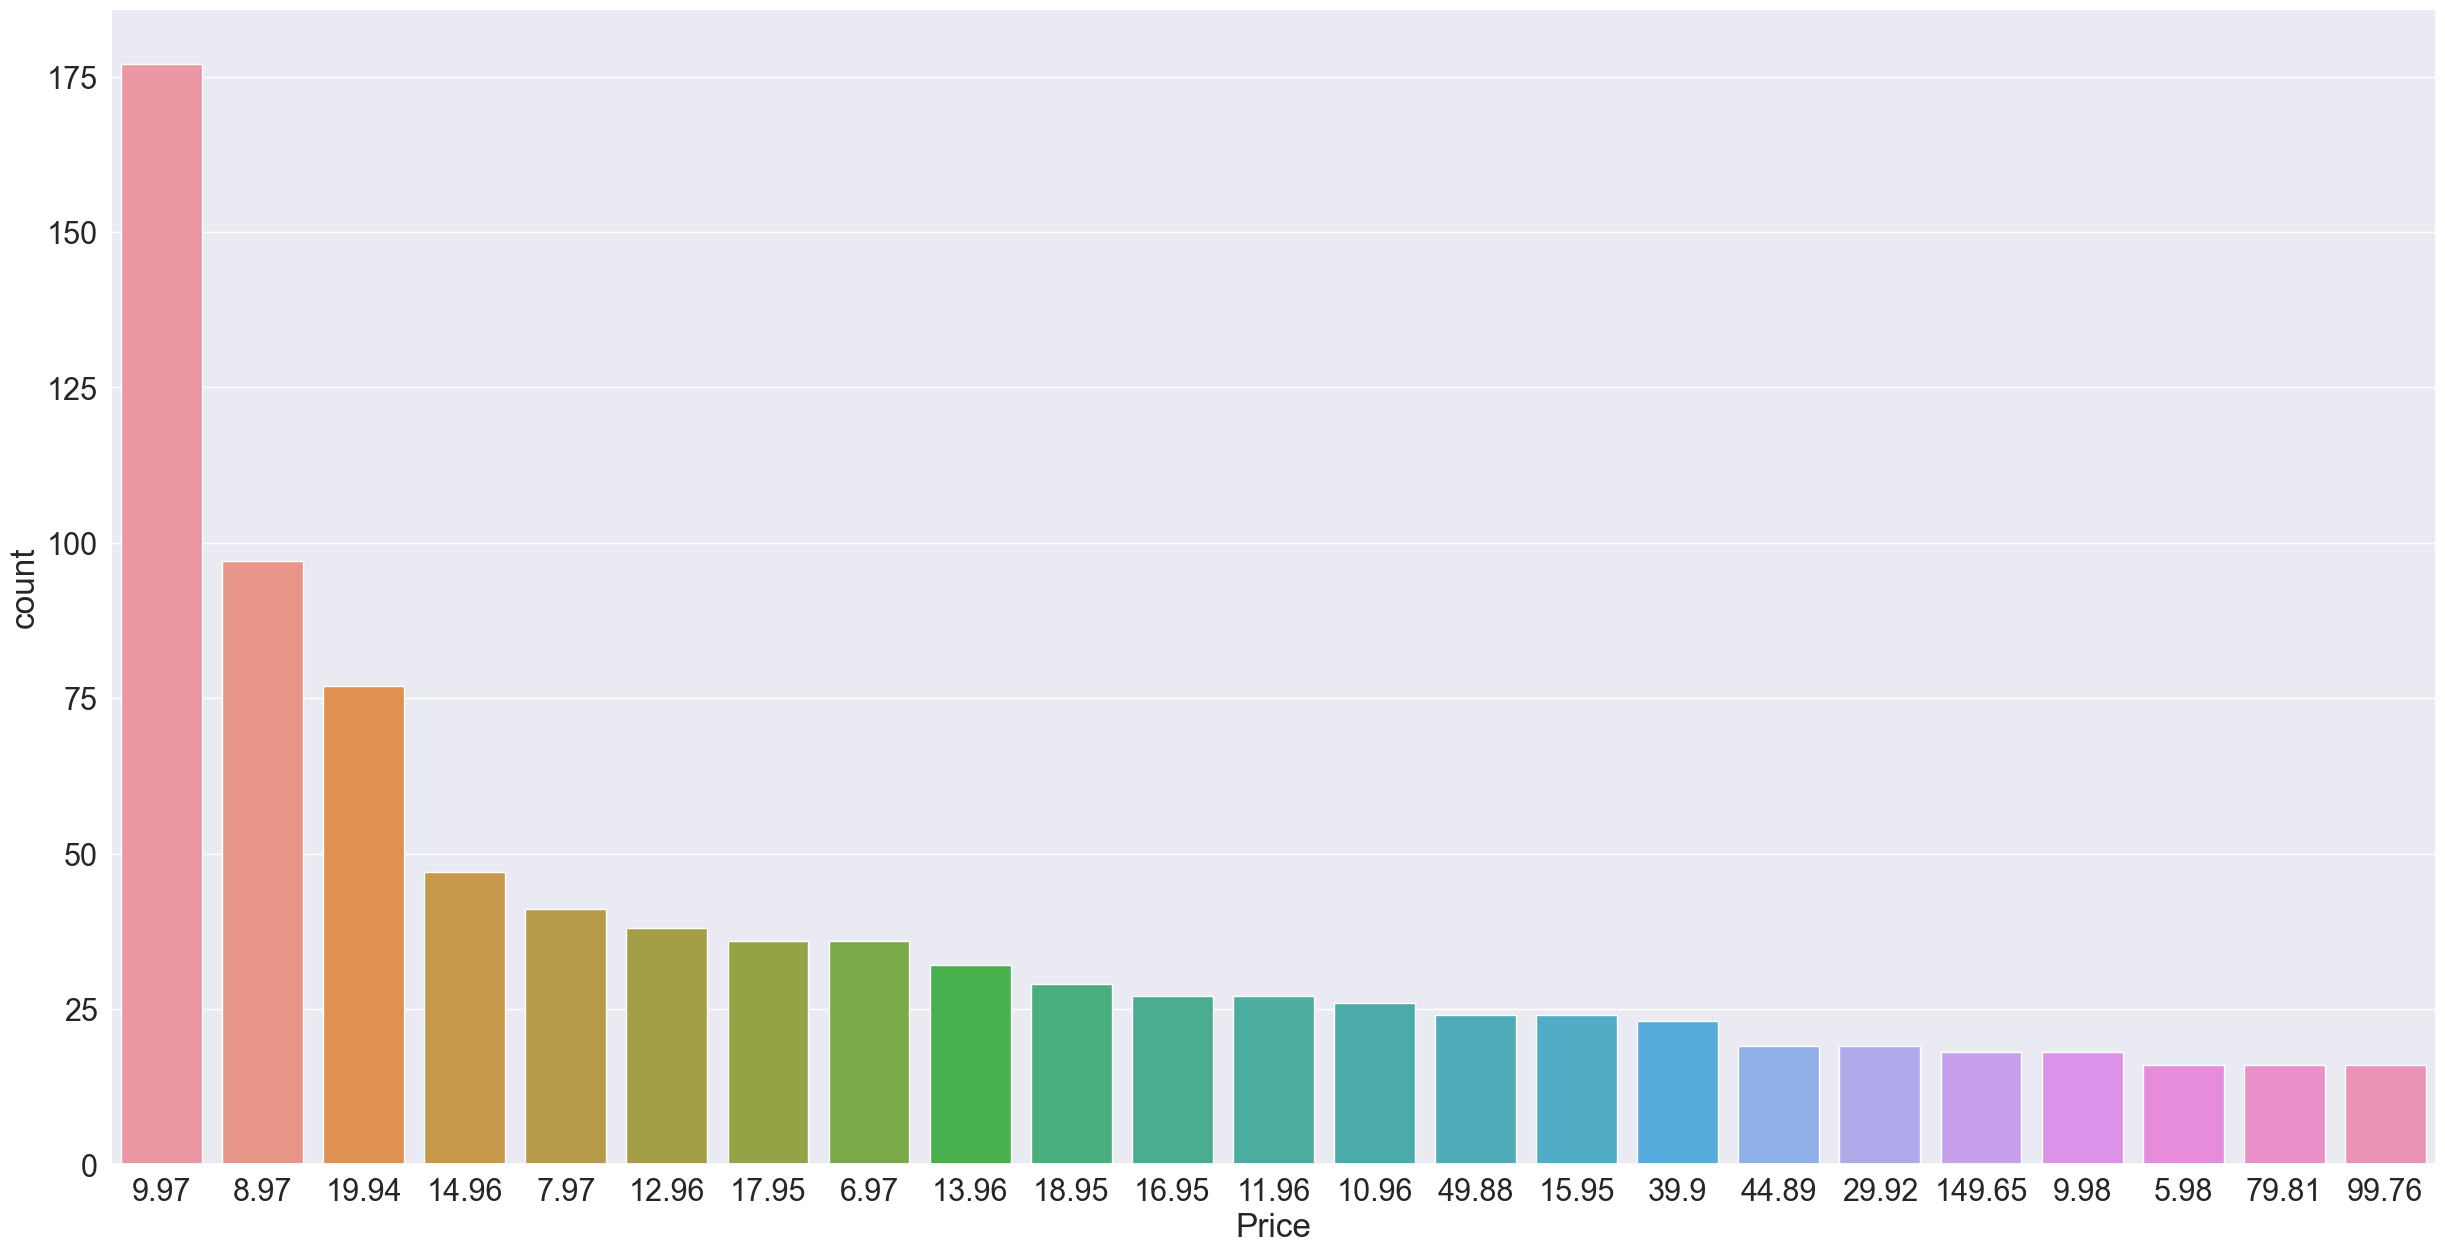

In [32]:
df_price = round(wines_df["Price"],2)
sns.countplot(x = df_price, order = df_price.value_counts().iloc[:23].index)

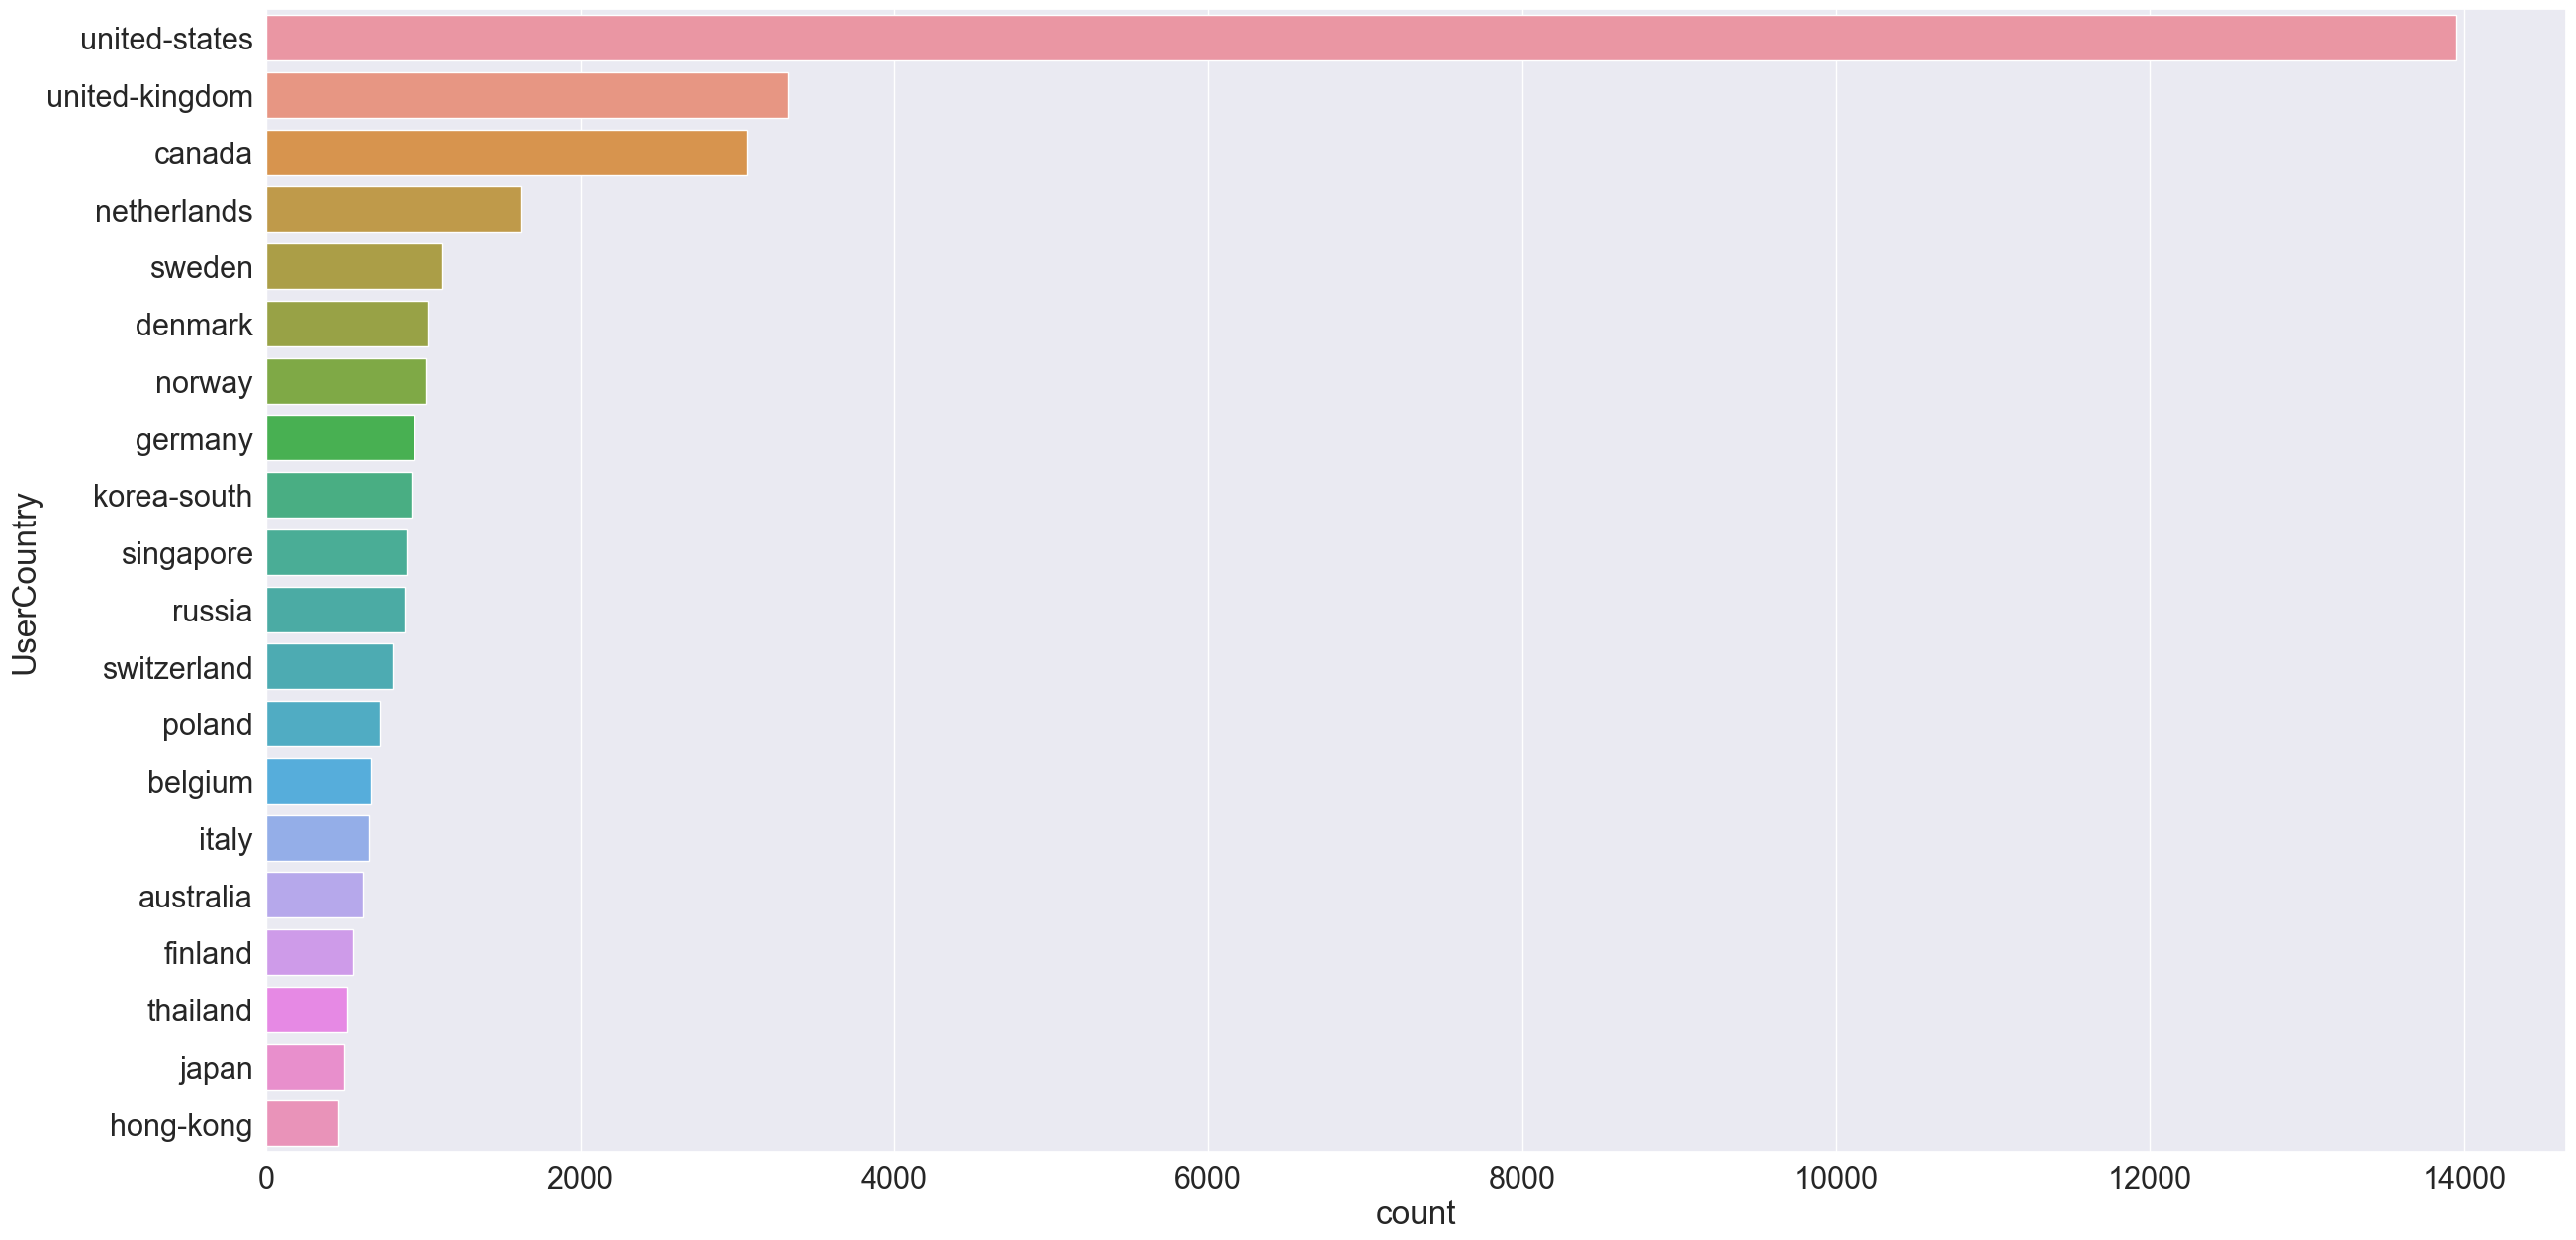

In [33]:
sns.countplot(y = df_users[df_users['Country']=='italy']['UserCountry'], order = df_users[df_users['Country']=='italy']['UserCountry'].value_counts().iloc[:20].index)
sns.set(rc={'figure.figsize':(30, 10)}, font_scale = 3)
